In [1]:
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('data/putin_complete.json')
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist
0,1999-12-31 00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Ev...",22280.0,"The Kremlin, Moscow",New Year Address by Acting President Vladimir ...,,[],"Dear friends, On New Year’s Eve, my family and...","[dear, friend, ,, on, New, Year, ’s, Eve, ,, m..."
1,1999-12-31 00:02:00,[],"Vladimir Putin: Good afternoon, distinguished ...",22326.0,"The Kremlin, Moscow",Address at an expanded meeting of the Russian ...,,[],"Good afternoon, distinguished colleagues. This...","[good, afternoon, ,, distinguished, colleague,..."
2,1999-12-31 00:03:00,[],"Boris Yeltsin: Dear Russians, In a few hours w...",24080.0,"The Kremlin, Moscow",Statement by Boris Yeltsin,,[],,[]
3,2000-01-04 00:00:00,[],"Question: Mr Putin, the sudden resignation of ...",24377.0,Moscow,Interview with the ORT TV Channel,,[],Let’s try. It was about ten days before the Ne...,"[let, ’s, try, ., , it, be, about, ten, day, ..."
4,2000-01-11 00:00:00,[],"Vladimir Putin: Dear friends, We are again gat...",24116.0,"State Kremlin Palace, Moscow",Speech at gala function marking the second mil...,,[],"Dear friends, We are again gathered here today...","[dear, friend, ,, we, be, again, gather, here,..."


### transtcript unfiltred is column with division by speaker it might by not only putin's speeches
### transcript filterd is putin's speeches only
### wordlist based on putin's speeches only

In [3]:
#first row
df.iloc[2]

date                                                   1999-12-31 00:03:00
persons                                                                 []
transcript_unfiltered    Boris Yeltsin: Dear Russians, In a few hours w...
kremlin_id                                                         24080.0
place                                                  The Kremlin, Moscow
title                                           Statement by Boris Yeltsin
teaser                                                                    
tags                                                                    []
transcript_filtered                                                       
wordlist                                                                []
Name: 2, dtype: object

In [4]:
print(len(df))
putins_talks = df[df['transcript_filtered'] != '']
print(len(putins_talks))

9838
9335


In [5]:
#place cleaning
putins_talks['place'].value_counts()

place
The Kremlin, Moscow                              2813
Novo-Ogaryovo, Moscow Region                      832
                                                  618
Sochi                                             616
Moscow                                            607
                                                 ... 
Taman, Kerch                                        1
Grozny, Severny Airport                             1
The State Duma, Moscow                              1
Tsugol training range, Trans-Baikal Territory       1
Mineralnye Vody                                     1
Name: count, Length: 810, dtype: int64

<Axes: xlabel='date'>

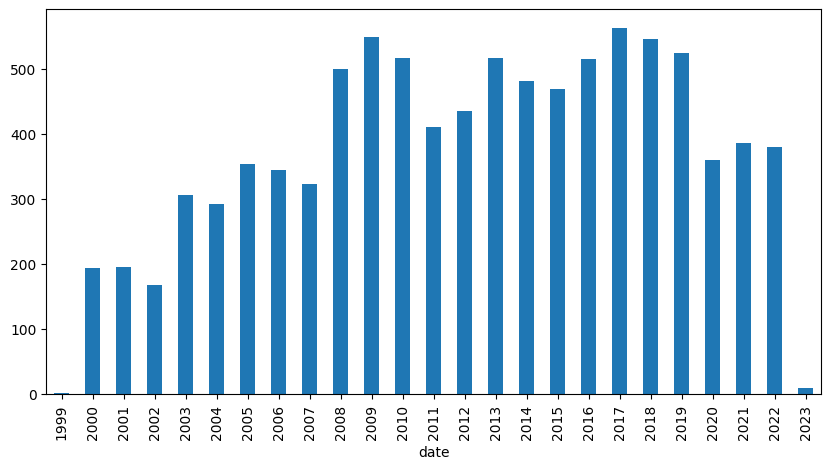

In [6]:
#speeches per year
years  = putins_talks['date']
years = years.dt.year
years.value_counts().sort_index().plot(kind='bar', figsize=(10,5))


### quite old data
### lets have speeches from moment Putin became president

In [7]:
putins_talks = putins_talks[putins_talks['date'] > '2012-05-06']
putins_talks

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist
4265,2012-05-07 12:20:00,[],The ceremony opened with the Russian State Fla...,15224.0,"The Kremlin, Moscow",Vladimir Putin inaugurated as President of Russia,The inauguration ceremony took place in the Gr...,[],"Citizens of Russia, friends, The inauguration ...","[citizen, of, Russia, ,, friend, ,, the, inaug..."
4266,2012-05-08 16:00:00,[],State Duma deputies approved Dmitry Medvedev a...,15266.0,Moscow,State Duma plenary session,Vladimir Putin presented the candidacy of Dmit...,[Civil service],"Mr Naryshkin, deputies of the Russian parliame...","[Mr, Naryshkin, ,, deputy, of, the, russian, p..."
4267,2012-05-09 11:00:00,[],"More than 14,000 military servicemen took part...",15271.0,Moscow,Military parade celebrating the 67th anniversa...,Vladimir Putin attended the military parade on...,[Armed Forces],Citizens of Russia! Veterans! Comrade soldiers...,"[citizen, of, Russia, !, veteran, !, comrade, ..."
4268,2012-05-09 13:00:00,[],* * * President of Russia Vladimir Putin: Vete...,15272.0,,Reception marking the 67th anniversary of vict...,A reception marking the 67th anniversary of vi...,[],"Veterans, colleagues, friends! We all share th...","[veteran, ,, colleague, ,, friend, !, we, all,..."
4269,2012-05-10 14:00:00,[],Vladimir Putin thanked the members of the plan...,15282.0,Nizhny Tagil,Visit to Research and Production Corporation U...,"In Nizhny Tagil, Vladimir Putin visited Uralva...",[Regions],"Good afternoon, I want to thank all of you for...","[good, afternoon, ,, I, want, to, thank, all, ..."
...,...,...,...,...,...,...,...,...,...,...
9344,2023-01-10 13:45:00,[],President of Russia Vladimir Putin: Mr Shaskol...,70336.0,"The Kremlin, Moscow",Meeting with Federal Anti-Monopoly Service Hea...,Vladimir Putin had a working meeting with Head...,[Economy and finance],"Mr Shaskolsky, the Federal Anti-Monopoly Servi...","[Mr, Shaskolsky, ,, the, Federal, Anti, -, Mon..."
9345,2023-01-11 15:50:00,[],The meeting was attended by Prime Minister Mik...,70338.0,"Novo-Ogaryovo, Moscow Region",Meeting with Government members,The President held a videoconference meeting w...,"[Construction industry, Economy and finance, I...","Good afternoon, colleagues, We are holding the...","[good, afternoon, ,, colleague, ,, we, be, hol..."
9346,2023-01-12 00:00:00,[],President of Russia Vladimir Putin: Comrade of...,70341.0,,Congratulations on Prosecutor's Office Workers...,The President congratulated current staff and ...,[Fight against crime],"Comrade officers, veterans, Congratulations on...","[comrade, officer, ,, veteran, ,, congratulati..."
9347,2023-01-13 12:55:00,[],President of Russia Vladimir Putin: Mr Khabiro...,70347.0,Ufa,Meeting with Head of Bashkortostan Radiy Khabirov,The President had a meeting with Head of the R...,[Regions],"Mr Khabirov, good afternoon. Let me start by s...","[Mr, Khabirov, ,, good, afternoon, ., , let, ..."


In [8]:
dates_tags = putins_talks[['date', 'tags']].explode('tags')

In [9]:
dates_tags["tags"].value_counts()

tags
Foreign policy                      1698
Regions                              661
Economy and finance                  409
Armed Forces                         339
National security                    255
                                    ... 
May 2012 Executive Orders              2
Inflation                              2
Customs Union                          1
Pool of high-potential managers        1
National Final School Exam (EGE)       1
Name: count, Length: 86, dtype: int64

In [10]:
dates_tags["tags"].unique()

array([nan, 'Civil service', 'Armed Forces', 'Regions', 'Sochi 2014',
       'Foreign policy', 'Economy and finance',
       'Fight against corruption', 'Science and innovation', 'CIS',
       'Industry', 'National security', 'Sport',
       'Law enforcement agencies', 'Public control',
       'Support for business', 'Culture', 'Energy', 'Parties', 'Children',
       'Demographics', 'State decorations', 'Court',
       'Interethnic relations', 'State awards', 'Budget',
       'Fight against terrorism', 'Migration', 'G20', 'Banks',
       'Compatriots', 'Religion', 'Energy efficiency', 'Environment',
       'Professional training', 'Social services', 'Customs', 'EurAsEC',
       'WTO', 'Healthcare', 'Transport', 'Media', 'Human rights',
       'Disabled individuals', 'APEC', 'Trade unions',
       'Information society', 'Telecommunications', 'School',
       'Russia–European Union', 'Pensions', 'Land relations',
       'Agriculture', 'Housing', 'Labour market', 'Taxes',
       'Construc

In [11]:
TOPIC_TO_GROUP_MAPPING = {
    # --- Group 1: International Relations & Global Organizations ---
    'Foreign policy': 'International_Relations_Global_Organizations',
    'CIS': 'International_Relations_Global_Organizations',
    'G20': 'International_Relations_Global_Organizations',
    'WTO': 'International_Relations_Global_Organizations',
    'APEC': 'International_Relations_Global_Organizations',
    'Russia–European Union': 'International_Relations_Global_Organizations',
    'CSTO': 'International_Relations_Global_Organizations',
    'BRICS': 'International_Relations_Global_Organizations',
    'G8': 'International_Relations_Global_Organizations',
    'UN': 'International_Relations_Global_Organizations',
    'EAEU': 'International_Relations_Global_Organizations',
    'Customs Union': 'International_Relations_Global_Organizations',
    'SCO': 'International_Relations_Global_Organizations',
    'Russia–ASEAN': 'International_Relations_Global_Organizations',
    'EurAsEC': 'International_Relations_Global_Organizations',

    # --- Group 2: Macroeconomics & Fiscal Policy ---
    'Economy and finance': 'Macroeconomics_Fiscal_Policy',
    'Budget': 'Macroeconomics_Fiscal_Policy',
    'Banks': 'Macroeconomics_Fiscal_Policy',
    'Customs': 'Macroeconomics_Fiscal_Policy',
    'Taxes': 'Macroeconomics_Fiscal_Policy',
    'Investment': 'Macroeconomics_Fiscal_Policy',
    'Import replacement': 'Macroeconomics_Fiscal_Policy',
    'Anti-sanctions': 'Macroeconomics_Fiscal_Policy',
    'Inflation': 'Macroeconomics_Fiscal_Policy',
    'Labour market': 'Macroeconomics_Fiscal_Policy',

    # --- Group 3: Business & Special Development ---
    'Support for business': 'Business_Special_Development',
    'Special economic zones': 'Business_Special_Development',
    'Priority development areas': 'Business_Special_Development',
    'Trade unions': 'Business_Special_Development',
    'Priority National Projects': 'Business_Special_Development',

    # --- Group 4: State Governance & Public Service ---
    'Civil service': 'State_Governance_Public_Service',
    'Regions': 'State_Governance_Public_Service',
    'Public control': 'State_Governance_Public_Service',
    'Parties': 'State_Governance_Public_Service',
    'State decorations': 'State_Governance_Public_Service',
    'State awards': 'State_Governance_Public_Service',
    'Local self-government': 'State_Governance_Public_Service',
    'May 2012 Executive Orders': 'State_Governance_Public_Service',

    # --- Group 5: Security, Defense & Enforcement ---
    'Armed Forces': 'Security_Defense_Enforcement',
    'National security': 'Security_Defense_Enforcement',
    'Law enforcement agencies': 'Security_Defense_Enforcement',
    'Fight against terrorism': 'Security_Defense_Enforcement',
    'Fight against crime': 'Security_Defense_Enforcement',
    'Fight against drugs': 'Security_Defense_Enforcement',
    'Road safety': 'Security_Defense_Enforcement',

    # --- Group 6: Justice, Anti-Corruption & Rights ---
    'Court': 'Justice_Anti-Corruption_Rights',
    'Fight against corruption': 'Justice_Anti-Corruption_Rights',
    'Human rights': 'Justice_Anti-Corruption_Rights',

    # --- Group 7: Social_Welfare_Health ---
    'Children': 'Social_Welfare_Health',
    'Demographics': 'Social_Welfare_Health',
    'Social services': 'Social_Welfare_Health',
    'Healthcare': 'Social_Welfare_Health',
    'Pensions': 'Social_Welfare_Health',
    'Disabled individuals': 'Social_Welfare_Health',
    'Medicines': 'Social_Welfare_Health',
    'Migration': 'Social_Welfare_Health',

    # --- Group 8: Education_Personnel ---
    'Professional training': 'Education_Personnel',
    'School': 'Education_Personnel',
    'Universities': 'Education_Personnel',
    'National Final School Exam (EGE)': 'Education_Personnel',
    'Pool of high-potential managers': 'Education_Personnel',

    # --- Group 9: Infrastructure_Housing_Construction ---
    'Industry': 'Infrastructure_Housing_Construction',
    'Transport': 'Infrastructure_Housing_Construction',
    'Construction industry': 'Infrastructure_Housing_Construction',
    'Housing': 'Infrastructure_Housing_Construction',
    'Housing and utilities': 'Infrastructure_Housing_Construction',

    # --- Group 10: Natural_Resources_Primary_Industries_Environment ---
    'Energy': 'Natural_Resources_Primary_Industries_Environment',
    'Energy efficiency': 'Natural_Resources_Primary_Industries_Environment',
    'Environment': 'Natural_Resources_Primary_Industries_Environment',
    'Alternative energy': 'Natural_Resources_Primary_Industries_Environment',
    'Climate': 'Natural_Resources_Primary_Industries_Environment',
    'Land relations': 'Natural_Resources_Primary_Industries_Environment',
    'Agriculture': 'Natural_Resources_Primary_Industries_Environment',

    # --- Group 11: Science, IT & Space ---
    'Science and innovation': 'Science_IT_Space',
    'Information society': 'Science_IT_Space',
    'Telecommunications': 'Science_IT_Space',
    'Space': 'Science_IT_Space',

    # --- Group 12: Culture_Identity_History ---
    'Culture': 'Culture_Identity_History',
    'Interethnic relations': 'Culture_Identity_History',
    'Compatriots': 'Culture_Identity_History',
    'Religion': 'Culture_Identity_History',
    'Great Patriotic War': 'Culture_Identity_History',

    # --- Group 13: Sport, Tourism & Media ---
    'Sport': 'Sport_Tourism_Media',
    'Sochi 2014': 'Sport_Tourism_Media',
    'Tourism': 'Sport_Tourism_Media',
    'Media': 'Sport_Tourism_Media',
}

In [12]:
#for each tag in list map it to group
putins_talks['grouped_tages'] = putins_talks['tags'].apply(
    lambda tags_list: [TOPIC_TO_GROUP_MAPPING[tag] for tag in tags_list])


In [13]:
#time/ tags

dates = []
tags_list = []

for index, row in putins_talks.iterrows():
    date, tags = row['date'], row['grouped_tages']
    tags = set(tags)
    tags = list(tags)
    for tag in tags:
        dates.append(date)
        tags_list.append(tag)

dates_tags = pd.DataFrame({'date': dates, 'tags': tags_list})
dates_tags

,date,tags
0,2012-05-08 16:00:00,State_Governance_Public_Service
1,2012-05-09 11:00:00,Security_Defense_Enforcement
2,2012-05-10 14:00:00,State_Governance_Public_Service
3,2012-05-11 13:00:00,Sport_Tourism_Media
4,2012-05-11 16:00:00,International_Relations_Global_Organizations
...,...,...
6292,2023-01-11 15:50:00,Macroeconomics_Fiscal_Policy
6293,2023-01-12 00:00:00,Security_Defense_Enforcement
6294,2023-01-13 12:55:00,State_Governance_Public_Service
6295,2023-01-13 14:35:00,Sport_Tourism_Media


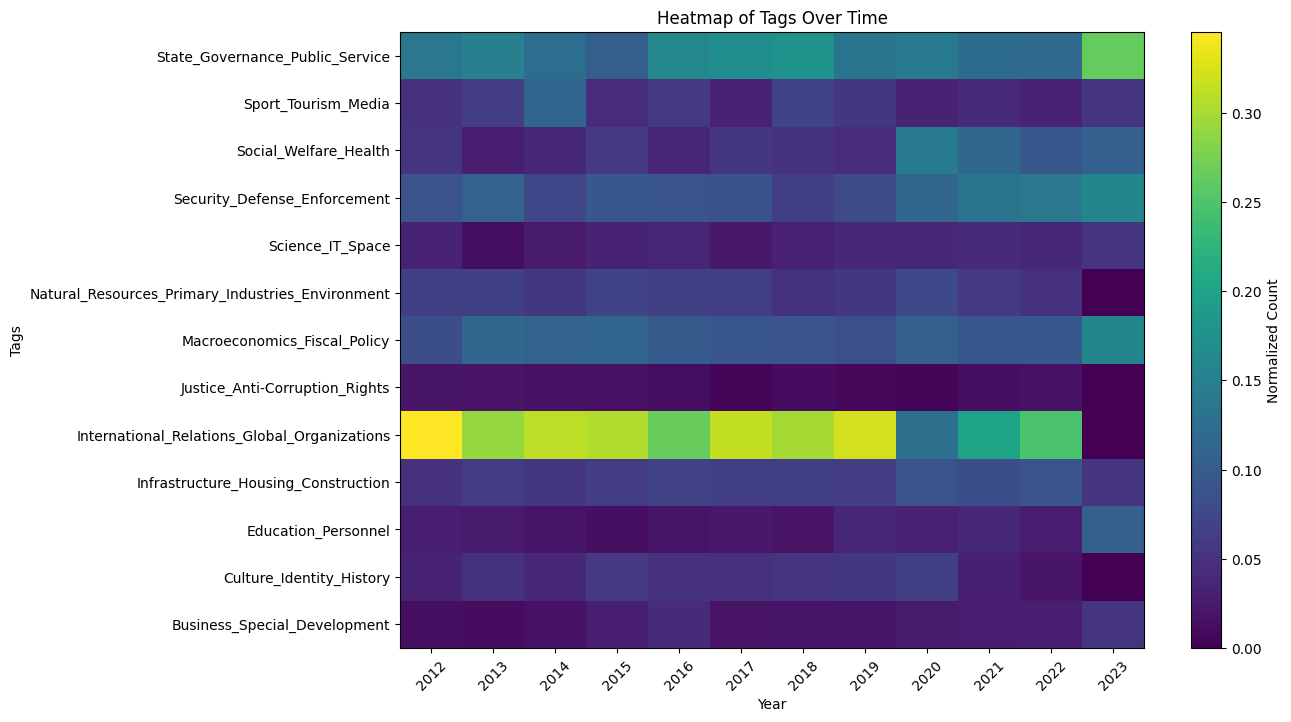

In [14]:
#make a heatmap of tags over time with normalized counts
heatmap_data = dates_tags.copy()
heatmap_data['year'] = heatmap_data['date'].dt.year
heatmap_data = heatmap_data.groupby(['year', 'tags']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data.T, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Normalized Count')
plt.yticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.xticks(range(len(heatmap_data.index)), heatmap_data.index, rotation=45)
plt.xlabel('Year')
plt.ylabel('Tags')
plt.title("Heatmap of Tags Over Time")
plt.show()

In [15]:
#save prepared dataset
putins_talks.to_csv('data/putins_talks_prepared.csv', index=False)
dates_tags.to_csv('data/dates_tags.csv', index=False)